# Assignment 1 - Linear Regression

Class: COMP 5630 - Machine Learning

Author: Chris Hinkson

Email: cmh0201@auburn.edu

This project implements a simple linear regression model from scratch (purely in Numpy). It 

### Table of Contents

1) [Project Imports and Configuration](#project-imports-and-configuration)
2) [Task 1 Report](#task-1-report)
3) [Task 2 Report](#task-2-report)


## Project Imports and Configuration

Some module imports and configurations are needed for this project. The below code cell loads all of the needed modules for both tasks in this assignment. While the individual task reports may identify how specific modules are used, a general description of the modules is as follows:

- [Python's OS Module](https://docs.python.org/3/library/os.html) allows for interacting with various system interfaces, primarily files in this project.
- [Requests](https://pypi.org/project/requests/) provides HTTP support for downloading resources.
- [Numpy](https://numpy.org/) allows for efficient data storage.
- [MatPlotLib](https://matplotlib.org/) allows for making plot figures to display results.
- [TQDM](https://tqdm.github.io/) makes displaying iteration progress much easier via progress bars.

Additionally, because this project needs to reference data at a specific path (relative to this notebook, `../data/`), this code cell will also download the datasets to the proper directory for use later on in this project if they have not already been downloaded. There are five data files needed for this project:

- [Task 1 X Training Data](../data/x_train.npy)
- [Task 1 Y Training Data](../data/y_train.npy)
- [Task 1 X Testing Data](../data/x_test.npy)
- [Task 1 Y Testing Data](../data/y_test.npy)
- [Task 2 Dataset](../data/Housing_data_regression.xlsx)

In [ ]:
'''
MODULE IMPORTS
'''

# System
import os
import requests

# Data
import numpy as np
import matplotlib.pyplot as plt

# Display
from tqdm import tqdm

'''
DATA DOWNLOAD
'''

# Data Directory
if not os.path.isdir("../data/"):
	os.makedirs(name="../data/", exist_ok=True)
	print(f"Data directory has been created at `../data/`!")
else:
	print(f"Data directory already exists at `../data/`!")

projectDataFiles = ["x_train.npy", "y_train.npy", "x_test.npy", "y_test.npy", "Housing_data_regression.xlsx"]
for projectDataFile in projectDataFiles:
	if not os.path.exists(f"../data/{projectDataFile}"):
		print(f"-> {projectDataFile} is missing from the data directory!")
		response = requests.get(f"https://github.com/cmh02/COMP5630---Machine-Learning/blob/main/Assignment1%20-%20Linear%20Regression/data/{projectDataFile}?raw=true")
		with open(f"../data/{projectDataFile}", "wb") as dataFile:
			dataFile.write(response.content)
		print(f"-> File saved to ../data/{projectDataFile}!")
	else:
		print(f"{projectDataFile} already exists at ../data/{projectDataFile}!")

Data directory already exists at `../data/`!
-> x_train.npy is missing from the data directory!
-> File saved to ../data/x_train.npy!
-> y_train.npy is missing from the data directory!
-> File saved to ../data/y_train.npy!
-> x_test.npy is missing from the data directory!
-> File saved to ../data/x_test.npy!
-> y_test.npy is missing from the data directory!
-> File saved to ../data/y_test.npy!
-> Housing_data_regression.xlsx is missing from the data directory!
-> File saved to ../data/Housing_data_regression.xlsx!


## Task 1 Report

Attempting to load training and testing data from directory `../data/`!
-> Reshaped training X data to shape (100, 1)!
-> Reshaped training Y data to shape (100, 1)!
-> Reshaped testing X data to shape (100, 1)!
-> Reshaped testing Y data to shape (100, 1)!
Successfully loaded training and testing data from directory `../data/`!
-> Data Shape: trainingX = (100, 1), trainingY = (100, 1), testingX = (100, 1), testingY = (100, 1)
-> Data Mean: trainingX = -0.11, trainingY = -139.92, testingX = 0.09, testingY = 5.54
-> Data StdDev: trainingX = 1.70, trainingY = 658.01, testingX = 0.58, testingY = 7.14


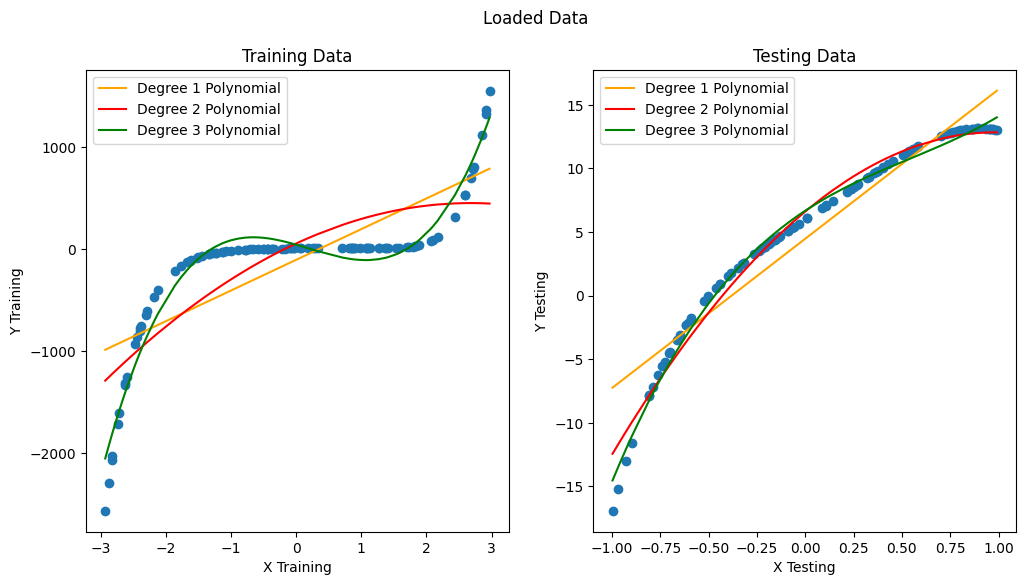

In [60]:
'''
DATA LOADER CLASS

This code cell will provide a DataLoader class to load provided numpy arrays for use in
the linear regression model. 
'''
class DataLoader:

	# Class Constructor
	def __init__(self, dataDirectoryPath: str="../data/", plotData: bool=False) -> None:

		# Save directory path
		self.dataDirectoryPath = dataDirectoryPath

		# Announce data load
		print(f"Attempting to load training and testing data from directory `{self.dataDirectoryPath}`!")

		# Define x_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		xTrainPath = os.path.join(self.dataDirectoryPath, "x_train.npy")
		if not os.path.exists(xTrainPath):
			raise FileNotFoundError(f"Attempted to load X-Train numpy array but could not find file `{xTrainPath}`!")
		self.trainingX = np.load(xTrainPath)
		if self.trainingX is None:
			raise Exception(f"Attempted to load X-Train numpy array but the array was not set!")
		if len(self.trainingX.shape) == 1:
			self.trainingX = self.trainingX.reshape(-1, 1)
			print(f"-> Reshaped training X data to shape {self.trainingX.shape}!")

		# Define y_train path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTrainPath = os.path.join(self.dataDirectoryPath, "y_train.npy")
		if not os.path.exists(yTrainPath):
			raise FileNotFoundError(f"Attempted to load Y-Train numpy array but could not find file `{yTrainPath}`!")
		self.trainingY = np.load(yTrainPath)
		if self.trainingY is None:
			raise Exception(f"Attempted to load Y-Train numpy array but the array was not set!")
		if len(self.trainingY.shape) == 1:
			self.trainingY = self.trainingY.reshape(-1, 1)
			print(f"-> Reshaped training Y data to shape {self.trainingY.shape}!")

		# Define x_test path, check if it exists, load data if so, verify load, then reshape for model if necessary 
		xTestPath = os.path.join(self.dataDirectoryPath, "x_test.npy")
		if not os.path.exists(xTestPath):
			raise FileNotFoundError(f"Attempted to load X-Test numpy array but could not find file `{xTestPath}`!")
		self.testingX = np.load(xTestPath)
		if self.testingX is None:
			raise Exception(f"Attempted to load X-Test numpy array but the array was not set!")
		if len(self.testingX.shape) == 1:
			self.testingX = self.testingX.reshape(-1, 1)
			print(f"-> Reshaped testing X data to shape {self.testingX.shape}!")

		# Define y_test path, check if it exists, load data if so, verify load, then reshape for model if necessary
		yTestPath = os.path.join(self.dataDirectoryPath, "y_test.npy")
		if not os.path.exists(yTestPath):
			raise FileNotFoundError(f"Attempted to load Y-Test numpy array but could not find file `{yTestPath}`!")
		self.testingY = np.load(yTestPath)
		if self.testingY is None:
			raise Exception(f"Attempted to load Y-Test numpy array but the array was not set!")
		if len(self.testingY.shape) == 1:
			self.testingY = self.testingY.reshape(-1, 1)
			print(f"-> Reshaped testing Y data to shape {self.testingY.shape}!")

		# Print data load information
		print(f"Successfully loaded training and testing data from directory `{self.dataDirectoryPath}`!")
		print(f"-> Data Shape: trainingX = {self.trainingX.shape}, trainingY = {self.trainingY.shape}, testingX = {self.testingX.shape}, testingY = {self.testingY.shape}")
		print(f"-> Data Mean: trainingX = {np.mean(self.trainingX):.2f}, trainingY = {np.mean(self.trainingY):.2f}, testingX = {np.mean(self.testingX):.2f}, testingY = {np.mean(self.testingY):.2f}")
		print(f"-> Data StdDev: trainingX = {np.std(self.trainingX):.2f}, trainingY = {np.std(self.trainingY):.2f}, testingX = {np.std(self.testingX):.2f}, testingY = {np.std(self.testingY):.2f}")

		# Create class figure and axes incase if want to plot data
		if plotData:

			# Configure plot figure
			self._createPlotFigure()

			# Create plots
			self.plotTrainingData()
			self.plotTestingData()

		else:
			# If we aren't going to have plots yet, set values to None
			self.fig, (self.ax1, self.ax2) = None, (None, None)

	# Create class figure and axes
	def _createPlotFigure(self) -> None:
		self.fig, (self.ax1, self.ax2) = plt.subplots(1, 2, figsize=(12, 6))
		self.fig.suptitle("Loaded Data")
		self.fig.canvas.draw()

	# Plot training data
	def plotTrainingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax1.set_title("Training Data")
		self.ax1.set_xlabel("X Training")
		self.ax1.set_ylabel("Y Training")

		# Get data back as 1D vector for plotting
		trainingXvector = self.trainingX.flatten()
		trainingYvector = self.trainingY.flatten()

		# Plot training data
		self.ax1.scatter(trainingXvector, trainingYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 1))(np.unique(trainingXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 2))(np.unique(trainingXvector)), color='red', label='Degree 2 Polynomial')
		self.ax1.plot(np.unique(trainingXvector), np.poly1d(np.polyfit(trainingXvector, trainingYvector, 3))(np.unique(trainingXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax1.legend()
		self.fig.canvas.draw()

	# Plot testing data
	def plotTestingData(self) -> None:

		# Check if figure and axes exist, create if not
		if not self.fig:
			self._createPlotFigure()

		# Configure plot figure
		self.ax2.set_title("Testing Data")
		self.ax2.set_xlabel("X Testing")
		self.ax2.set_ylabel("Y Testing")

		# Get data back as 1D vector for plotting
		testXvector = self.testingX.flatten()
		testYvector = self.testingY.flatten()

		# Plot testing data
		self.ax2.scatter(testXvector, testYvector)

		# Plot best-fit lines (using method described at https://stackoverflow.com/a/31800660)
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 1))(np.unique(testXvector)), color='orange', label='Degree 1 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 2))(np.unique(testXvector)), color='red', label='Degree 2 Polynomial')
		self.ax2.plot(np.unique(testXvector), np.poly1d(np.polyfit(testXvector, testYvector, 3))(np.unique(testXvector)), color='green', label='Degree 3 Polynomial')

		# Show plot
		self.ax2.legend()
		self.fig.canvas.draw()

# Load data from the data directory
Task1DataLoader = DataLoader(dataDirectoryPath="../data/", plotData=True)

In [61]:
'''
LINEAR REGRESSION CLASS

This code cell will provide a LinearRegression class to perform linear regression on a given dataset.
'''
class LinearRegression:

	# Class Constructor
	def __init__(self, learningRate: float=0.01, numIterations: int=1000) -> None:

		# Initialize instance variables
		self.learningRate = learningRate
		self.numIterations = numIterations
		self.weights = None
		self.bias = None
		self.trainingLosses = []

	# Train the model on a given dataset 
	def trainModel(self, trainingX: np.ndarray, trainingY: np.ndarray) -> np.ndarray:

		# Print training data information
		print(f"-> Beginning model training with learning rate {self.learningRate} for {self.numIterations} iterations!")

		# If weights have not been initialized, set them all to zero
		if self.weights is None:
			self.weights = np.zeros(shape=(trainingX.shape[1], 1))
			self.bias = 0
			print(f"-> Initialized weights (shape {self.weights.shape}) and bias to zeros!")

		# Perform gradient descent for the specified number of iterations
		for iteration in tqdm(iterable=range(self.numIterations), desc="Training Progress", unit="iterations"):

			# Calculate the predictions, which is X * weights + bias, and should result in same shape as trainingX
			predictionsY = np.dot(trainingX, self.weights) + self.bias

			# Calculate MSE loss for the iteration
			self.trainingLosses.append(self._calculateMSE(predictionsY, trainingY))

			# Update the weights by calculating the loss gradient
			weightsGradient = (2 / trainingX.shape[0]) * np.dot(trainingX.T, (predictionsY - trainingY))
			self.weights -= self.learningRate * weightsGradient
			
			# Update the bias by calculating the loss gradient
			biasGradient = (2 / trainingX.shape[0]) * np.sum(predictionsY - trainingY)
			self.bias -= self.learningRate * biasGradient

		# Return losses
		self.trainingLosses = np.array(self.trainingLosses)
		return self.trainingLosses

	# Evaluate model performance on given dataset
	def testModel(self, testX: np.ndarray, testY: np.ndarray) -> tuple:

		# Get predictions
		predictionsY = self._predict(testX)

		# Calculate metrics
		testMeanSquaredError = self._calculateMSE(predictionsY, testY)
		testMeanAbsoluteError = self._calculateMAE(predictionsY, testY)
		testRSquared = self._calculateRSquared(predictionsY, testY)

		# Return
		return testMeanSquaredError, testMeanAbsoluteError, testRSquared, predictionsY

	# Make batch predictions on input data
	def _predict(self, inputX: np.ndarray) -> np.ndarray:

		# Check if model has been trained
		if (self.weights is None) or (self.bias is None):
			raise Exception("The weights and bias are not set yet! Please train model before making predictions!")
		
		# Return predictions
		return np.dot(inputX, self.weights) + self.bias
	
	# Calculate Mean Squared Error
	def _calculateMSE(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		return np.mean((predictedY - actualY) ** 2)
	
	# Calculate Mean Absolute Error
	def _calculateMAE(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		return np.mean(np.abs(predictedY - actualY))
	
	# Calculate R Squared
	def _calculateRSquared(self, predictedY: np.ndarray, actualY: np.ndarray) -> float:
		residualSumOfSquared = np.sum((actualY - predictedY) ** 2)
		totalSumOfSquares = np.sum((actualY - np.mean(actualY)) ** 2)
		return 1 - (residualSumOfSquared / totalSumOfSquares)



Creating Linear Regression Model!
-> Beginning model training with learning rate 0.01 for 1000 iterations!
-> Initialized weights (shape (1, 1)) and bias to zeros!


Training Progress: 100%|██████████| 1000/1000 [00:00<00:00, 73528.81iterations/s]

Train metrics: MSE = 172822.60339569926, MAE = 326.56859954286244, R^2 = 0.6008559451693981
Test metrics: MSE = 35281.33987756846, MAE = 157.46573752234784, R^2 = -690.901858471614


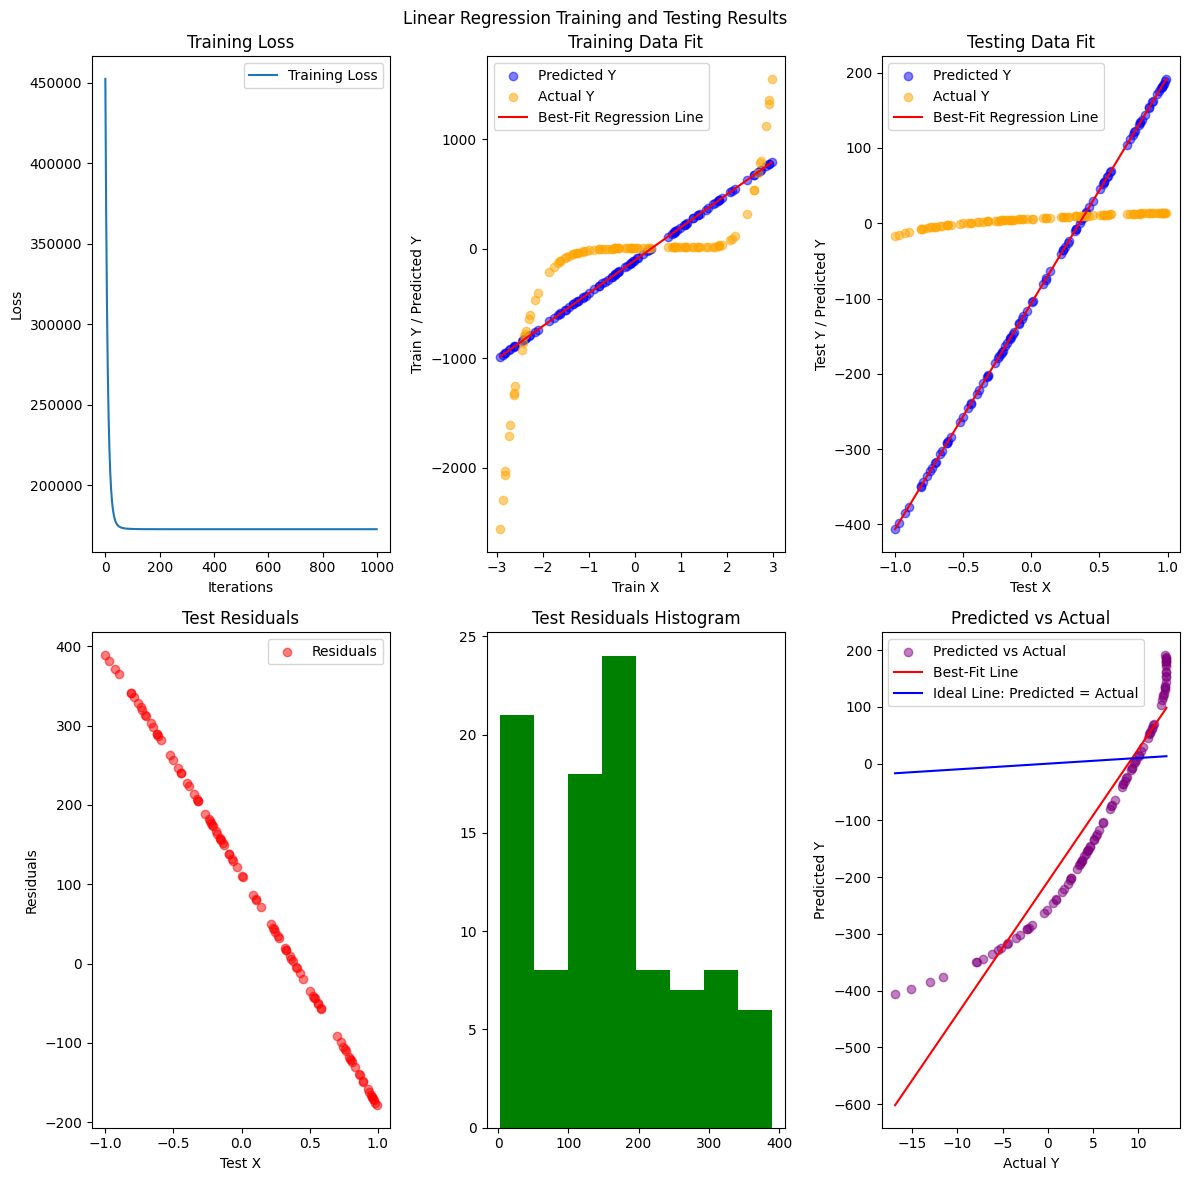

In [81]:
'''
TASK 1 EXECUTION

This code cell will create a linear regression model then train and test it on the provided datasets.
'''

# Initialize model and train it
print(f"\nCreating Linear Regression Model!")
LinearRegressionModel = LinearRegression(learningRate=0.01, numIterations=1000)
trainingLosses = LinearRegressionModel.trainModel(Task1DataLoader.trainingX, Task1DataLoader.trainingY)

# Get the training and testing metrics
trainMeanSquaredError, trainMeanAbsoluteError, trainRSquared, trainPredictionsY = LinearRegressionModel.testModel(Task1DataLoader.trainingX, Task1DataLoader.trainingY)
testMeanSquaredError, testMeanAbsoluteError, testRSquared, testPredictionsY = LinearRegressionModel.testModel(Task1DataLoader.testingX, Task1DataLoader.testingY)
print(f"Train metrics: MSE = {trainMeanSquaredError}, MAE = {trainMeanAbsoluteError}, R^2 = {trainRSquared}")
print(f"Test metrics: MSE = {testMeanSquaredError}, MAE = {testMeanAbsoluteError}, R^2 = {testRSquared}")

# Make plot figure to display results (loss over time, predictions vs actual)
fig, axs = plt.subplots(2, 3, figsize=(12, 12))
fig.suptitle(f"Linear Regression Training and Testing Results")
fig.canvas.draw()

# Plot training loss over iterations
axs[0, 0].plot(trainingLosses, label="Training Loss")
axs[0, 0].set_title("Training Loss")
axs[0, 0].set_xlabel("Iterations")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].legend()

# Plot training x vs y predictions and actual
axs[0, 1].scatter(Task1DataLoader.trainingX, trainPredictionsY, color='blue', alpha=0.5, label='Predicted Y')
axs[0, 1].scatter(Task1DataLoader.trainingX, Task1DataLoader.trainingY, color='orange', alpha=0.5, label='Actual Y')
axs[0, 1].plot(np.unique(Task1DataLoader.trainingX.flatten()), np.poly1d(np.polyfit(Task1DataLoader.trainingX.flatten(), trainPredictionsY.flatten(), 1))(np.unique(Task1DataLoader.trainingX.flatten())), color='red', label='Best-Fit Regression Line')
axs[0, 1].set_title("Training Data Fit")
axs[0, 1].set_xlabel("Train X")
axs[0, 1].set_ylabel("Train Y / Predicted Y")
axs[0, 1].legend()

# Plot testing x vs y predictions and actual
axs[0, 2].scatter(Task1DataLoader.testingX, testPredictionsY, color='blue', alpha=0.5, label='Predicted Y')
axs[0, 2].scatter(Task1DataLoader.testingX, Task1DataLoader.testingY, color='orange', alpha=0.5, label='Actual Y')
axs[0, 2].plot(np.unique(Task1DataLoader.testingX.flatten()), np.poly1d(np.polyfit(Task1DataLoader.testingX.flatten(), testPredictionsY.flatten(), 1))(np.unique(Task1DataLoader.testingX.flatten())), color='red', label='Best-Fit Regression Line')
axs[0, 2].set_title("Testing Data Fit")
axs[0, 2].set_xlabel("Test X")
axs[0, 2].set_ylabel("Test Y / Predicted Y")
axs[0, 2].legend()

# Plot residuals
axs[1, 0].scatter(Task1DataLoader.testingX, Task1DataLoader.testingY - testPredictionsY, color='red', alpha=0.5, label='Residuals')
axs[1, 0].set_title("Test Residuals")
axs[1, 0].set_xlabel("Test X")
axs[1, 0].set_ylabel("Residuals")
axs[1, 0].legend()

# Plot residuals histogram
axs[1, 1].hist(np.abs(Task1DataLoader.testingY - testPredictionsY), bins='auto', color='green')
axs[1, 1].set_title("Test Residuals Histogram")

# Plot y predictions vs actual (and the ideal line where pred == actual)
axs[1, 2].scatter(Task1DataLoader.testingY, testPredictionsY, color='purple', alpha=0.5, label='Predicted vs Actual')
axs[1, 2].plot(np.unique(Task1DataLoader.testingY.flatten()), np.poly1d(np.polyfit(Task1DataLoader.testingY.flatten(), testPredictionsY.flatten(), 1))(np.unique(Task1DataLoader.testingY.flatten())), color='red', label='Best-Fit Line')
axs[1, 2].plot([min(Task1DataLoader.testingY), max(Task1DataLoader.testingY)], [min(Task1DataLoader.testingY), max(Task1DataLoader.testingY)], color='blue', label='Ideal Line: Predicted = Actual')
axs[1, 2].set_title("Predicted vs Actual")
axs[1, 2].set_xlabel("Actual Y")
axs[1, 2].set_ylabel("Predicted Y")
axs[1, 2].legend()

# Show plots
plt.tight_layout()
plt.show()

## Task 2 Report